# PARTE A. Perceptron - Conjunto de dados Iris

In [1]:
import pandas as pd

Xy = pd.read_csv('./datasets/iris_adapted_mcp.csv')

X = Xy.drop(['sepal-width', 'petal-width', 'class'], axis = 1)
y = Xy['class']

X.head()

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


# Separando os dados de treino e teste

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [3]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando MCP com dados de treino normalizados

In [4]:
from mcp.mcp import MCP

cls_mcp = MCP()
cls_mcp.fit(X_train_scaler, y_train)
cls_mcp.score(X_test, y_test)

0.7

# Matriz de confusão

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_mcp.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
...
'''
conf_matrix

array([[10,  0,  3],
       [ 0,  0,  6],
       [ 0,  0, 11]])

# Superfície de decisão das amostras e retas produzidas pelo vetor de pesos

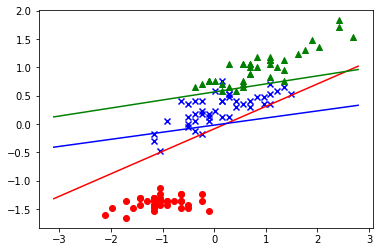

In [28]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = X_train_scaler[:][:].values
percetrons_weights = cls_mcp.get_weights()

x_ax = np.arange(data[: ,0].min()-1, data[: ,1].max()+1, 0.1)
w1 = percetrons_weights[0][1]
w2 = percetrons_weights[0][2]
b = percetrons_weights[0][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='red')

w1 = percetrons_weights[1][1]
w2 = percetrons_weights[1][2]
b = percetrons_weights[1][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='blue')


w1 = percetrons_weights[2][1]
w2 = percetrons_weights[2][2]
b = percetrons_weights[2][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='green')

setosa = np.where(y_train == 'Iris-setosa')
versicolor = np.where(y_train == 'Iris-versicolor')
virginica = np.where(y_train == 'Iris-virginica')
plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='green', marker='^', label='virginica')

plt.show()

# PARTE B. Rede Perceptron - Conjunto de dados Coluna Vertebral 

In [76]:
import pandas as pd

Xy = pd.read_csv('./datasets/column_2C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[2:], axis=1)
y = Xy[Xy.columns[-1]]

X.head()

,0,1
0,63.03,22.55
1,39.06,10.06
2,68.83,22.22
3,69.30,24.65
4,49.71,9.65


# Separando os dados de treino e teste

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [91]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando MCP com dados de treino normalizados

In [92]:
from mcp.mcp import MCP

cls_mcp = MCP(num_class=2)
cls_mcp.fit(X_train_scaler, y_train)
cls_mcp.score(X_test, y_test)

0.6935483870967742

# Matriz de confusão

In [93]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_mcp.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
...
'''
conf_matrix

array([[43,  0],
       [19,  0]])

# Superfície de decisão das amostras e retas produzidas pelo vetor de pesos

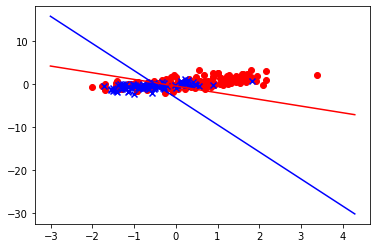

In [94]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = X_train_scaler[:][:].values
percetrons_weights = cls_mcp.get_weights()

x_ax = np.arange(data[: ,0].min()-1, data[: ,1].max()+1, 0.1)
w1 = percetrons_weights[0][1]
w2 = percetrons_weights[0][2]
b = percetrons_weights[0][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='red')

w1 = percetrons_weights[1][1]
w2 = percetrons_weights[1][2]
b = percetrons_weights[1][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='blue')

ab = np.where(y_train == 'AB')
no = np.where(y_train == 'NO')
plt.scatter(data[ab, 0], data[ab, 1],
            color='red', marker='o', label='ab')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='x', label='no')

plt.show()

# Testando com 3 classses

In [95]:
import pandas as pd

Xy = pd.read_csv('./datasets/column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[2:], axis=1)
y = Xy[Xy.columns[-1]]

X.head()

,0,1
0,63.03,22.55
1,39.06,10.06
2,68.83,22.22
3,69.30,24.65
4,49.71,9.65


# Separando os dados de treino e teste

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [97]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando MCP com dados de treino normalizados

In [98]:
from mcp.mcp import MCP

cls_mcp = MCP()
cls_mcp.fit(X_train_scaler, y_train)
cls_mcp.score(X_test, y_test)

0.5483870967741935

# Matriz de confusão

In [99]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_mcp.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
...
'''
conf_matrix

array([[ 0,  0, 11],
       [ 0,  0, 17],
       [ 0,  0, 34]])

# Superfície de decisão das amostras e retas produzidas pelo vetor de pesos

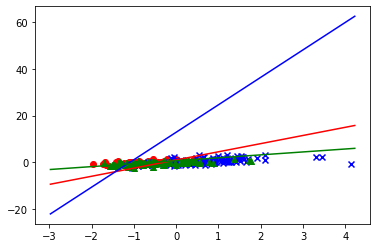

In [101]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = X_train_scaler[:][:].values
percetrons_weights = cls_mcp.get_weights()

x_ax = np.arange(data[: ,0].min()-1, data[: ,1].max()+1, 0.1)
w1 = percetrons_weights[0][1]
w2 = percetrons_weights[0][2]
b = percetrons_weights[0][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='red')

w1 = percetrons_weights[1][1]
w2 = percetrons_weights[1][2]
b = percetrons_weights[1][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='blue')


w1 = percetrons_weights[2][1]
w2 = percetrons_weights[2][2]
b = percetrons_weights[2][0]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='green')

dh = np.where(y_train == 'DH')
sl = np.where(y_train == 'SL')
no = np.where(y_train == 'NO')
plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='x', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='^', label='no')

plt.show()

# PARTE C. Adaline - Conjunto de dados de Construção Residencial

In [56]:
import pandas as pd

Xy = pd.read_excel('./datasets/residential_building.xlsx')

X = Xy.drop(Xy.columns[len(Xy.columns) - 2:], axis=1)
y_1 = Xy[Xy.columns[len(Xy.columns) - 2]]
y_2 = Xy[Xy.columns[-1]]

X.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-20.4,V-21.4,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5


# Separando os dados de treino e teste

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2)
y_2_train = y_2[y_1_train.index]
y_2_test = y_2[y_1_test.index]

# Treinando o MCA com os dados de treino

In [60]:
from mca.mca import MCA

cls_mca = MCA(num_class=2)
cls_mca.fit(X_train, [y_1_train, y_2_train])